# Lab | Customer Analysis Round 7

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

use the concept of multicollinearity and remove insignificant variables
use a different method of scaling the numerical variables
use a different ratio of train test split
use the transformation on numerical columns which align it more towards a normal distribution
Get the data

We are using the marketing_customer_analysis.csv file.

Dealing with the data

Already done in rounds 2 to 7.

Bonus: Build a function, from round 2 and round 7, to clean and process the data.

Explore the data

Done in the round 3.

Modeling

Description:

Try to improve the linear regression model.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
data = pd.read_csv('/Users/igorhufnagel/Desktop/Ironhack/LABS/Week 3/LAB_customer-analysis-round-7/lab-customer-analysis-round-7/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [22]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [23]:
numericals = data.select_dtypes(include=['float64', 'int64'])
categoricals = data.select_dtypes('object')

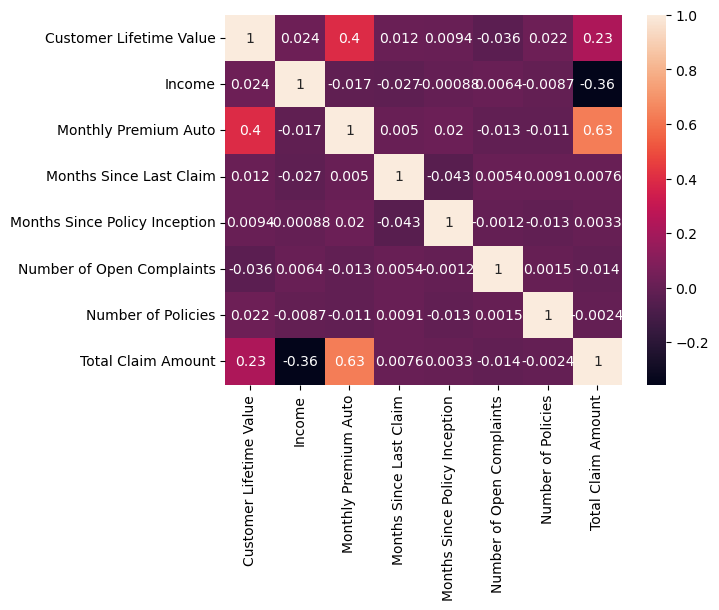

In [24]:
# Use the concept of multicollinearity and remove insignificant variables

sns.heatmap(numericals.corr(),annot=True)
plt.show()

In [8]:
# Considering 'Total Claim Amount' that I want to predict in my model, the relationship with the other variables
# are stronger in 'Customer Lifetime Value', 'Income', 'Montlhy Premium Auto', so I will drop all the rest, including
# the categoricals ones, which I will not use in the model.

In [25]:
numericals.drop(['Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'], axis=1,inplace=True)

In [26]:
numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Total Claim Amount'],
      dtype='object')

In [27]:
# use a different method of scaling the numerical variables

from sklearn.preprocessing import MinMaxScaler

In [29]:
X = numericals.drop(["Total Claim Amount"], axis=1)
X = pd.DataFrame(MinMaxScaler().fit(X).transform(X))
Y = numericals["Total Claim Amount"]

In [32]:
X.head()

,0,1,2
0,0.010629,0.562847,0.033755
1,0.062406,0.000000,0.139241
2,0.134960,0.487763,0.198312
3,0.070589,0.000000,0.189873
4,0.011245,0.438443,0.050633


In [34]:
for col in categoricals.columns:
    Z = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(categoricals[col])).transform(pd.DataFrame(categoricals[col])).toarray())

In [35]:
Z.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [36]:
X = pd.DataFrame(np.concatenate((X, Z), axis=1))

In [37]:
X.head()

,0,1,2,3,4,5
0,0.010629,0.562847,0.033755,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.0,1.0,0.0


In [46]:
# use a different ratio of train test split

# Train-test split.

# using the ratio of 0.25 for 

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.8, random_state=140)

In [47]:
model = sm.OLS(y_train,X_train).fit()

In [48]:
predictions = model.predict(X_test)

In [49]:
# R2

r2_score(y_test, predictions)

0.5275581667086535

In [50]:
# MSE

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

print (mse)

40139.906433172015


In [51]:
# RMSE 

import math

rmse = math.sqrt(mse)
print (rmse)

200.3494607758454


In [52]:
# MAE

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,predictions)
print (mae)

142.16682460573955


In [53]:
Y.describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

In [ ]:
# The average claim amount is 434.088794 euros so using the RSME value of 200.3494607758454 euros and comparing
# with the previous value, I get an error of prediction of approximately 53%, which it can conclude that also 
# this model is not a good model to apply.